# Import data

In [3]:
import os
import pandas as pd
import collections
import seaborn as sns

In [2]:
def importCsvs(path):
    # Import the csv files
    # path: path to the csv files
    # return: dictionary of dataframes for each challenge and each predicate

    allDfs = {} # Dictionary of dataframes for each challenge and each predicate

    # Iterate over the folders
    for folder in os.listdir(path):
        # Iterate over the csv files
        for file in os.listdir(path + folder):
            # Read the csv file
            df = pd.read_csv(path + folder + "/" + file)
            # Add the dataframe to the dictionary
            if folder not in allDfs:
                allDfs[folder] = {}
            allDfs[folder][file[:-4]] = df

    return allDfs

# Import the csv files
allDfs = importCsvs("all/")
trainDfs = importCsvs("train/")
testDfs = importCsvs("test/")

# Data analysis

Count number of submissions, correct and incorrect. 

In [4]:
def analyzeData(allDfs):
    analysisDf = pd.DataFrame({"Challenge": [], "Predicate": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, cmdDfs in allDfs.items():
        for cmd, df in cmdDfs.items():
        # Update counter
            count = df["sat"].value_counts().to_dict()
            counter.update(count)
            analysisDf.loc[len(analysisDf)] = [
                challenge,
                cmd,
                len(df),
                len(df[df["sat"] == 0.0]),
                len(df[df["sat"] == 1.0])
            ]

    pd.set_option('display.max_rows', None)
    # Sort by number of submissions
    analysisDf = analysisDf.sort_values(by=['NumSubmissions'], ascending=False)

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["green", "red"])

    return analysisDf

## Analyze all submissions

Total number of submissions: 24289
Total number of correct submissions: 10646
Total number of incorrect submissions: 13643


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
81,YH3ANm7Y5Qe5dSYem,inv11,598,78,520
84,YH3ANm7Y5Qe5dSYem,inv14,544,57,487
45,gAeD3MTGCCv8YNTaK,weaklyConnected,531,78,453
98,zoEADeCW2b2suJB2k,inv4,529,70,459
15,9jPK8KBWzjFmBx4Hb,prop5,424,65,359
82,YH3ANm7Y5Qe5dSYem,inv12,420,61,359
44,gAeD3MTGCCv8YNTaK,undirected,412,209,203
3,9jPK8KBWzjFmBx4Hb,prop12,409,37,372
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267
72,sDLK7uBCbgZon3znd,inv7,380,157,223


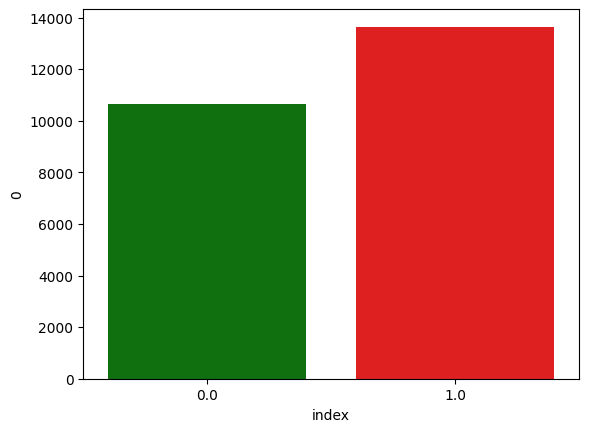

In [6]:
analyzeData(allDfs)

## Analyze train data

Total number of submissions: 21242
Total number of correct submissions: 9331
Total number of incorrect submissions: 11911


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
81,YH3ANm7Y5Qe5dSYem,inv11,523,59,464
45,gAeD3MTGCCv8YNTaK,weaklyConnected,444,64,380
15,9jPK8KBWzjFmBx4Hb,prop5,423,65,358
3,9jPK8KBWzjFmBx4Hb,prop12,408,37,371
84,YH3ANm7Y5Qe5dSYem,inv14,404,41,363
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267
82,YH3ANm7Y5Qe5dSYem,inv12,383,41,342
98,zoEADeCW2b2suJB2k,inv4,377,54,323
1,9jPK8KBWzjFmBx4Hb,prop10,348,53,295
104,zRAn69AocpkmxXZnW,inv11,339,73,266


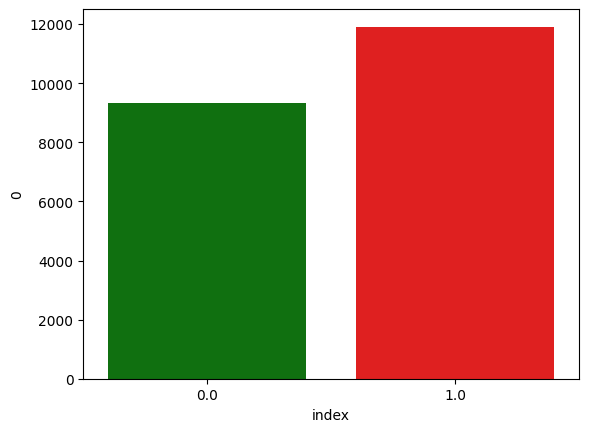

In [5]:
analyzeData(trainDfs)

## Analyze test data

Total number of submissions: 2675
Total number of correct submissions: 1149
Total number of incorrect submissions: 1526


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
98,zoEADeCW2b2suJB2k,inv4,152,16,136
61,PQAJE67kz8w5NWJuM,inv7,121,29,92
108,zRAn69AocpkmxXZnW,inv15,115,1,114
44,gAeD3MTGCCv8YNTaK,undirected,105,33,72
84,YH3ANm7Y5Qe5dSYem,inv14,99,13,86
60,PQAJE67kz8w5NWJuM,inv6,96,34,62
45,gAeD3MTGCCv8YNTaK,weaklyConnected,86,13,73
85,YH3ANm7Y5Qe5dSYem,inv15,82,12,70
54,PQAJE67kz8w5NWJuM,inv1,66,51,15
39,gAeD3MTGCCv8YNTaK,complete,65,19,46


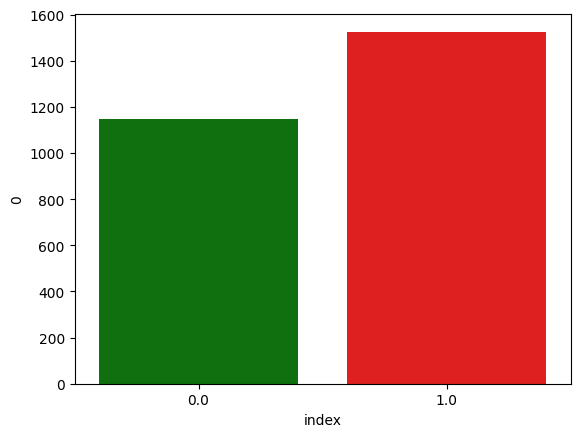

In [7]:
analyzeData(testDfs)

## Analyze Graph - All Submissions

In [4]:
def importGraphAnalytics(path):
    return pd.read_csv(path)

def analyzeGraphAnalytics(df):
    total_submissions = 0
    total_correct = 0
    total_incorrect = 0
    total_edges = 0

    for index, row in df.iterrows():
        total_submissions += row["NumSubmissions"]
        total_correct += row["NumCorrect"]
        total_incorrect += row["NumIncorrect"]
        total_edges += row["NumEdges"]

    print("Total number of submissions: " + str(total_submissions))
    print("Total number of correct submissions: " + str(total_correct))
    print("Total number of incorrect submissions: " + str(total_incorrect))
    print("Total number of edges: " + str(total_edges))

In [5]:
df = importGraphAnalytics("./resources/analytics_total_submissions.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 8754
Total number of correct submissions: 1198
Total number of incorrect submissions: 7556
Total number of edges: 13469


## Analyze Graphs - Train Submissions

In [6]:
df = importGraphAnalytics("./resources/analytics_train_submissions.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 7683
Total number of correct submissions: 1023
Total number of incorrect submissions: 6660
Total number of edges: 11792


In [15]:
train_percentage = 7683/8754 * 100
test_percentage = 100 - train_percentage

print("Train percentage: " + str(train_percentage))
print("Test percentage: " + str(test_percentage))

Train percentage: 87.76559287183002
Test percentage: 12.234407128169977
